In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


In [ ]:
# Dataset: OR logic gate
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 1, 1, 1])

In [ ]:
# Updated Perceptron class with `epoch` and print statements
class Perceptron:
    def __init__(self, learning_rate=0.1, n_epochs=10):
        self.lr = learning_rate
        self.n_epochs = n_epochs
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for epoch in range(self.n_epochs):
            print(f"\nEpoch {epoch+1}/{self.n_epochs}")
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self.activation_func(linear_output)
                update = self.lr * (y[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update
                print(f"Sample {x_i}, Target: {y[idx]}, Predicted: {y_pred}, Update: {update}")
            print(f"Weights: {self.weights}, Bias: {self.bias}")

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_func(linear_output)

In [ ]:
# Train perceptron
p = Perceptron()
p.fit(X, y)


Epoch 1/10
Sample [0 0], Target: 0, Predicted: 1, Update: -0.1
Sample [0 1], Target: 1, Predicted: 0, Update: 0.1
Sample [1 0], Target: 1, Predicted: 1, Update: 0.0
Sample [1 1], Target: 1, Predicted: 1, Update: 0.0
Weights: [0.  0.1], Bias: 0.0

Epoch 2/10
Sample [0 0], Target: 0, Predicted: 1, Update: -0.1
Sample [0 1], Target: 1, Predicted: 1, Update: 0.0
Sample [1 0], Target: 1, Predicted: 0, Update: 0.1
Sample [1 1], Target: 1, Predicted: 1, Update: 0.0
Weights: [0.1 0.1], Bias: 0.0

Epoch 3/10
Sample [0 0], Target: 0, Predicted: 1, Update: -0.1
Sample [0 1], Target: 1, Predicted: 1, Update: 0.0
Sample [1 0], Target: 1, Predicted: 1, Update: 0.0
Sample [1 1], Target: 1, Predicted: 1, Update: 0.0
Weights: [0.1 0.1], Bias: -0.1

Epoch 4/10
Sample [0 0], Target: 0, Predicted: 0, Update: 0.0
Sample [0 1], Target: 1, Predicted: 1, Update: 0.0
Sample [1 0], Target: 1, Predicted: 1, Update: 0.0
Sample [1 1], Target: 1, Predicted: 1, Update: 0.0
Weights: [0.1 0.1], Bias: -0.1

Epoch 5/10

In [ ]:
# Plotting decision regions
def plot_decision_regions(X, y, model):
    cmap = ListedColormap(['#FFAAAA', '#AAFFAA'])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                           np.arange(x2_min, x2_max, 0.01))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    predictions = model.predict(grid).reshape(xx1.shape)

    plt.contourf(xx1, xx2, predictions, alpha=0.3, cmap=cmap)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor='black')
    plt.title("Perceptron Decision Regions (OR gate)")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid(True)
    plt.show()

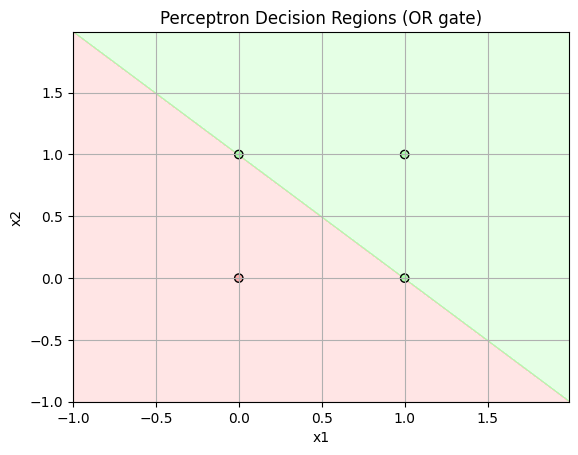

In [ ]:
plot_decision_regions(X, y, p)
